## House Prices 🏠
### 데이터 이해 및 탐색

- 각 피처에 대한 이해  
  OverallQual: 집의 전반적인 마감 품질 (높을수록 좋은 집)  
  GrLivArea: 집의 면적 (넓을수록 보통 더 비쌈)  
  YearBuilt: 집이 지어진 해  
  1stFlrSF: 1층 면적  
<br>
- 데이터의 분포와 특성을 파악하기 위한 시각화 
  Target(가격)의 분포 히스토그램 시각화 → 비대칭 → 로그 변환을 통해 정규 분포로 변환  
  회귀계수 시각화를 통해 데이터 분리 문제 확인 → K-Fold Cross Validation 적용  
<br>
### 데이터 전처리 과정
- 결측치 처리, 이상치 처리 등 데이터 정제가 적절하게 수행
  결측치 처리: 결측치 많은 컬럼 삭제. 나머지는 평균값으로 대체 (결측치 모두 제거 완료), 문자형 피처는 원-핫 인코딩 적용  
  이상치 처리: GrLivArea의 이상치 2개 제거  
  
- 데이터 스케일링 및 인코딩 등이 적절히 수행 
  standardscaler로 변환한 house_df_ss와 스케일 변환하지 않은 house_df_ohe의 선형 회귀를 각각 비교  

**house_df_ss**  
LinearRegression 스케일 변환&로그 변환된 RMSE: 0.131   
LinearRegression 스케일 변환&로그 변환해제 RMSE: 21257.558  
Ridge 스케일 변환&로그 변환된 RMSE: 0.13  
Ridge 스케일 변환&로그 변환해제 RMSE: 21183.698  
Lasso 스케일 변환&로그 변환된 RMSE: 0.398  
Lasso 스케일 변환&로그 변환해제 RMSE: 77569.402  

**house_df_ohe**  
LinearRegression 로그 변환된 RMSE: 0.131  
LinearRegression 로그 변환해제 RMSE: 21295.906  
Ridge 로그 변환된 RMSE: 0.132  
Ridge 로그 변환해제 RMSE: 22584.92  
Lasso 로그 변환된 RMSE: 0.177  
Lasso 로그 변환해제 RMSE: 33922.99  

스케일이 변환된 형태, 그 중에서도 릿지 모델이 가장 성능이 좋았다.  
Ridge 스케일 변환&로그 변환된 RMSE: 0.13  
Ridge 스케일 변환&로그 변환해제 RMSE: 21183.698  

### 모델 선택 및 비교

- 최소 3개 이상의 모델을 비교
  선형 회귀 모델: Linear, Ridge, Lasso, ElasticNet  
  트리 기반 회귀 모델: 하이퍼파라미터 + 5폴드 세트, XGBoost, LightGBM
  혼합 모델:  
  Lasso+Ridge(Ridge0.4 + Lasso0.6 최종 혼합 모델의 RMSE: 0.11284977071517663)  
  XGBoost+LightGBM(XGBoost0.6 + LightGBM0.4 최종 혼합 모델의 RMSE: 0.11371682545815355)  
  스태킹 회귀 모델 최종 RMSE 값은: 0.11154708840379529  

- 모델 선택 이유와 각 모델의 특성
  #### 선형 회귀 모델
---
##### Linear Regression
- **이유**: 가장 기본적인 회귀 모델
- **특성**: 피처 간 선형 관계를 가정, 해석이 직관적  

##### Ridge Regression
- **이유**: 다중 공선성 문제를 완화하고 과적합 방지  
- **특성**: L2 정규화

##### Lasso Regression
- **이유**: 중요 피처 선택 효과 기대  
- **특성**: L1 정규화로 불필요한 피처를 0으로 만든다.

##### ElasticNet
- **이유**: Ridge와 Lasso의 장점을 결합하여 유연한 조절 가능  
- **특성**: L1+L2 혼합, 균형 조절을 통해 과적합 방지 + 피처 선택 가능  

#### 트리 기반 회귀 모델
---
##### XGBoost
- **이유**: 성능이 우수하고 다양한 캐글 대회에서 검증됨  
- **특성**: Gradient Boosting 기반, 정교한 규제 옵션으로 과적합 제어 가능  

##### LightGBM
- **이유**: XGBoost보다 빠른 학습 속도와 적은 메모리 사용  
- **특성**: 대용량 데이터에 적합  

#### 혼합 모델
---
##### Lasso + Ridge
- **이유**: 두 모델의 특성(피처 선택 + 안정성)을 조합해 성능 향상 기대  
- **특성**: 두 모델의 예측값을 비율로 섞는 방식

##### XGBoost + LightGBM
- **이유**: 서로 다른 부스팅 방식의 모델을 조합해 일반화 성능 향상  
- **특성**: 앙상블을 통해 개별 모델보다 더 낮은 오차 달성 가능  

#### Stacking Regressor
---

- **이유**: 여러 모델의 예측값을 메타 모델이 다시 학습하여 최종 예측  
- **특성**: 다양한 모델의 장점을 통합하여 최고의 성능 도출 가능  
- **결과**: 최종 RMSE **0.1115**로 가장 우수한 성능  
  
### 성능 평가
#### 기본 회귀  
LinearRegression 로그 변환된 RMSE: 0.131  
LinearRegression 로그 변환해제 RMSE: 21295.906  
Ridge 로그 변환된 RMSE: 0.132  
Ridge 로그 변환해제 RMSE: 22584.92  
Lasso 로그 변환된 RMSE: 0.177  
Lasso 로그 변환해제 RMSE: 33922.99  

- StandardScaler로 스케일  
LinearRegression 스케일 변환&로그 변환된 RMSE: 0.131  
LinearRegression 스케일 변환&로그 변환해제 RMSE: 21257.558  
Ridge 스케일 변환&로그 변환된 RMSE: 0.13  
Ridge 스케일 변환&로그 변환해제 RMSE: 21183.698  
Lasso 스케일 변환&로그 변환된 RMSE: 0.398  
Lasso 스케일 변환&로그 변환해제 RMSE: 77569.402  

- 최적의 alpha값으로 튜닝  
LinearRegression 로그 변환된 RMSE: 0.131  
LinearRegression 로그 변환해제 RMSE: 21295.906
Ridge(alpha=12) 로그 변환된 RMSE: 0.128  
Ridge(alpha=12) 로그 변환해제 RMSE: 23159.75  
Lasso(lasso=0.001) 로그 변환된 RMSE: 0.122  
Lasso(lasso=0.001) 로그 변환해제 RMSE: 23121.426   

- 데이터 세트 로그 변환 후 최적의 alpha값으로 튜닝  
LinearRegression 로그 변환된 RMSE: 0.124  
LinearRegression 로그 변환해제 RMSE: 20177.977  
Ridge(alpha=10) 로그 변환된 RMSE: 0.116  
Ridge(alpha=10) 로그 변환해제 RMSE: 21542.856  
Lasso(alpha=0.001) 로그 변환된 RMSE: 0.111  
Lasso(alpha=0.001) 로그 변환해제 RMSE: 22157.381  

- 이상치 제거 후 alpha값으로 튜닝  
LinearRegression 로그 변환된 RMSE: 0.121  
LinearRegression 로그 변환해제 RMSE: 21295.11  
Ridge(alpha=5) 로그 변환된 RMSE: 0.117  
Ridge(alpha=5) 로그 변환해제 RMSE: 21189.92  
Lasso(alpha=0.001) 로그 변환된 RMSE: 0.112  
Lasso(alpha=0.001) 로그 변환해제 RMSE: 20410.53  


- 엘라스틱넷 회귀
ElasticNet 로그 변환된 RMSE: 0.24  
ElasticNet 로그 변환된 MSE: 0.058  
ElasticNet 로그 변환해제 RMSE: 44664.588  
ElasticNet 로그 변환해제 MSE: 1994925418.003  

#### 트리 기반 회귀
#### 혼합 모델  
릿지0.4 + 라쏘0.6  
최종 혼합 모델의 RMSE: 0.11284977071517663  
Ridge 모델의 RMSE: 0.1168652465139027  
Lasso 모델의 RMSE: 0.1119810145227005  

릿지0.6 + 라쏘 0.4
최종 혼합 모델의 RMSE: 0.11383592752866872  
Ridge 모델의 RMSE: 0.1168652465139027  
Lasso 모델의 RMSE: 0.1119810145227005  

XGBoost0.5 + LightGBM0.5
최종 혼합 모델의 RMSE: 0.11398712140542243  
XGBM 모델의 RMSE: 0.11565641776891314  
LGBM 모델의 RMSE: 0.11973930669985357  

XGBoost0.6 + LightGBM0.4
최종 혼합 모델의 RMSE: 0.11371682545815355  
XGBM 모델의 RMSE: 0.11565641776891314  
LGBM 모델의 RMSE: 0.11973930669985357  
 
XGBoost0.4 + LightGBM0.6
최종 혼합 모델의 RMSE: 0.11455884599258107  
XGBM 모델의 RMSE: 0.11565641776891314  
LGBM 모델의 RMSE: 0.11973930669985357  

#### 스태킹 회귀 모델
Lasso기반-스태킹 회귀 모델의 최종 RMSE 값은: 0.11154708840379529  
Ridge기반-스태킹 회귀 모델의 최종 RMSE 값은: 0.10959364723816757  

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house_df_org = pd.read_csv('train.csv')
house_df = house_df_org.copy()
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,968,20,RL,NaN,7390,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,135000
1,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000
2,696,20,RL,54.0,13811,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,176000


In [2]:
print('데이터 세트의 Shape:', house_df.shape)
print('\n전체 feature 들의 type \n',house_df.dtypes.value_counts())
isnull_series = house_df.isnull().sum()
print('\nNull 컬럼과 그 건수:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))

데이터 세트의 Shape: (1168, 81)

전체 feature 들의 type 
 object     43
int64      35
float64     3
Name: count, dtype: int64

Null 컬럼과 그 건수:
  PoolQC          1162
MiscFeature     1120
Alley           1098
Fence            941
MasVnrType       694
FireplaceQu      545
LotFrontage      218
GarageType        69
GarageYrBlt       69
GarageFinish      69
GarageQual        69
GarageCond        69
BsmtFinType2      24
BsmtExposure      24
BsmtFinType1      23
BsmtCond          23
BsmtQual          23
MasVnrArea         8
Electrical         1
dtype: int64


회귀 모델을 적용하기 전에, 타깃 값의 분포도가 정규 분포인지 확인

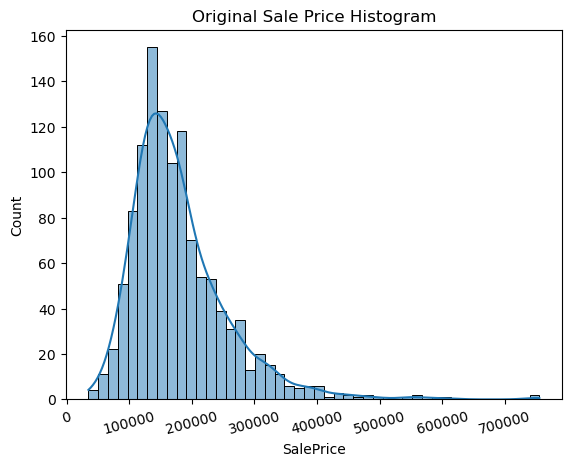

In [3]:
plt.title('Original Sale Price Histogram')
plt.xticks(rotation=15)
sns.histplot(house_df['SalePrice'], kde=True)
plt.show()

불균형한 데이터 분포이므로 로그 변환하여 정규 분포 형태로 변환

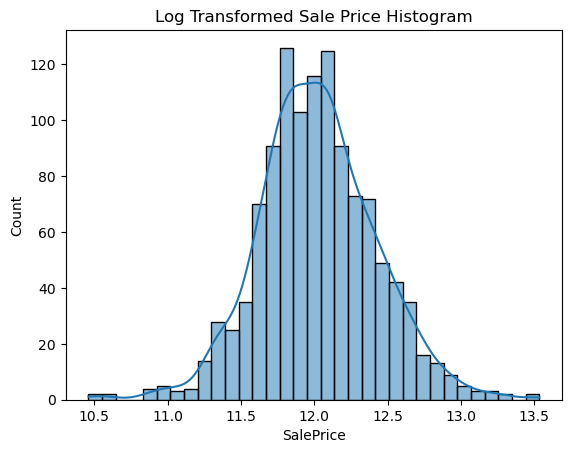

In [4]:
plt.title('Log Transformed Sale Price Histogram')
log_SalePrice = np.log1p(house_df['SalePrice'])
sns.histplot(log_SalePrice, kde=True)
plt.show()

In [5]:
# SalePrice 로그 변환
original_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

# Null 이 너무 많은 컬럼들과 불필요한 컬럼 삭제
house_df.drop(['Id','PoolQC' , 'MiscFeature', 'Alley', 'Fence','FireplaceQu'], axis=1 , inplace=True)
# Drop 하지 않는 숫자형 Null컬럼들은 평균값으로 대체
# house_df.fillna(house_df.mean(),inplace=True)
num_cols = house_df.select_dtypes(include=['number']).columns
house_df[num_cols] = house_df[num_cols].fillna(house_df[num_cols].mean())


# Null 값이 있는 피처명과 타입을 추출
null_column_count = house_df.isnull().sum()[house_df.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df.dtypes[null_column_count.index])

## Null 피처의 Type :
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


In [6]:
house_df.shape

(1168, 75)

In [7]:
isnull_series = house_df.isnull().sum()
print('\nNull 컬럼과 그 건수:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))


Null 컬럼과 그 건수:
  MasVnrType      694
GarageType       69
GarageFinish     69
GarageQual       69
GarageCond       69
BsmtExposure     24
BsmtFinType2     24
BsmtQual         23
BsmtCond         23
BsmtFinType1     23
Electrical        1
dtype: int64


문자형 피처를 제외하고는 null값이 없다.  
문자형 피처는 모두 원핫 인코딩으로 변환해준다. -> get_dummies

In [8]:
print('get_dummies() 수행 전 데이터 Shape:', house_df.shape)
house_df_ohe = pd.get_dummies(house_df)
print('get_dummies() 수행 후 데이터 Shape:', house_df_ohe.shape)

null_column_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df_ohe.dtypes[null_column_count.index])

get_dummies() 수행 전 데이터 Shape: (1168, 75)
get_dummies() 수행 후 데이터 Shape: (1168, 267)
## Null 피처의 Type :
 Series([], dtype: object)


In [9]:
house_df_ohe.isna().sum()[house_df_ohe.isna().sum() > 0]
# 문자형 -> 원핫 인코딩 마친 데이터프레임
# null값 없음

Series([], dtype: int64)

### StandardScaler로 house_df_ss 스케일링

In [10]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 데이터프레임 복사
house_df_ss = house_df_ohe.copy()
house_df_ss['SalePrice'] # house_df_ohe를 복사하였기 때문에 SalePrice가 로그 변환 되어있음

0       11.813037
1       12.095147
2       12.078245
3       12.669810
4       11.719134
          ...    
1163    12.206078
1164    12.154785
1165    12.513561
1166    12.520887
1167    12.791359
Name: SalePrice, Length: 1168, dtype: float64

In [11]:
house_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,70.058947,7390,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2008,WD,Normal,11.813037
1,90,RL,60.000000,10800,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2009,WD,Alloca,12.095147
2,20,RL,54.000000,13811,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2006,WD,Normal,12.078245
3,20,RL,93.000000,12030,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,12,2007,New,Partial,12.669810
4,50,RL,60.000000,8064,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2000,7,2007,WD,Normal,11.719134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,50,RM,63.000000,11426,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2008,WD,Normal,12.206078
1164,20,RL,137.000000,16492,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,6,2010,WD,Normal,12.154785
1165,20,RL,70.058947,11423,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2000,5,2010,WD,Normal,12.513561
1166,120,RL,62.000000,12677,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2008,WD,Normal,12.520887


In [12]:
# 타깃 분리
X = house_df_ss.drop(columns=['SalePrice'])
y = house_df_ss['SalePrice']

# 스케일 변환
X = X.fillna(X.mean())
scaler = StandardScaler()

X_scaled_array = scaler.fit_transform(X)

house_df_ss.loc[:, X.columns] = X_scaled_array
house_df_ss

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.874745,0.000000,-0.335534,-0.805358,1.245988,-0.533822,-1.451403,0.273911,0.993302,-0.280581,...,-0.058621,-0.299253,-0.041416,0.383859,-0.267506,-0.058621,-0.097506,-0.121531,0.466835,-0.304319
1,0.781175,-0.450659,0.052800,-0.805358,-0.528785,0.520563,0.144002,-0.586671,1.638091,-0.280581,...,-0.058621,-0.299253,-0.041416,0.383859,-0.267506,-0.058621,10.255819,-0.121531,-2.142082,-0.304319
2,-0.874745,-0.719470,0.395696,-0.076730,0.358601,0.520563,0.095656,-0.176327,1.162072,-0.016739,...,-0.058621,-0.299253,-0.041416,0.383859,-0.267506,-0.058621,-0.097506,-0.121531,0.466835,-0.304319
3,-0.874745,1.027801,0.192874,1.380524,-0.528785,1.179554,1.062568,0.860931,-0.958375,-0.280581,...,-0.058621,3.341656,-0.041416,-2.605123,-0.267506,-0.058621,-0.097506,-0.121531,-2.142082,3.286028
4,-0.165065,-0.450659,-0.258778,-0.805358,1.245988,-0.731519,1.014223,-0.586671,-0.958375,-0.280581,...,-0.058621,-0.299253,-0.041416,0.383859,-0.267506,-0.058621,-0.097506,-0.121531,0.466835,-0.304319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,-0.165065,-0.316254,0.124090,0.651897,-0.528785,1.047756,0.869186,-0.586671,-0.958375,-0.280581,...,-0.058621,-0.299253,-0.041416,0.383859,-0.267506,-0.058621,-0.097506,-0.121531,0.466835,-0.304319
1164,-0.874745,2.999080,0.701011,-0.076730,0.358601,-0.171377,0.820840,-0.586671,-0.423936,4.422407,...,-0.058621,-0.299253,-0.041416,0.383859,-0.267506,-0.058621,-0.097506,-0.121531,0.466835,-0.304319
1165,-0.874745,0.000000,0.123748,1.380524,-0.528785,0.981857,0.820840,2.143255,1.979959,-0.280581,...,-0.058621,-0.299253,-0.041416,0.383859,-0.267506,-0.058621,-0.097506,-0.121531,0.466835,-0.304319
1166,1.490855,-0.361055,0.266555,1.380524,-0.528785,1.047756,0.917532,2.103360,1.677038,-0.280581,...,-0.058621,-0.299253,-0.041416,0.383859,-0.267506,-0.058621,-0.097506,-0.121531,0.466835,-0.304319


In [13]:
print(np.isnan(X_scaled_array).sum())  # 결측치 생겼는지 확인

0


In [14]:
null_column_count = house_df_ss.isnull().sum()[house_df_ss.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df_ss.dtypes[null_column_count.index])

## Null 피처의 Type :
 Series([], dtype: object)


In [15]:
house_df_ss['SalePrice'] # target 값은 스케일 변환하지 않음

0       11.813037
1       12.095147
2       12.078245
3       12.669810
4       11.719134
          ...    
1163    12.206078
1164    12.154785
1165    12.513561
1166    12.520887
1167    12.791359
Name: SalePrice, Length: 1168, dtype: float64

In [16]:
house_df_ss.isna().sum()[house_df_ss.isna().sum() > 0]

Series([], dtype: int64)

In [17]:
def get_rmse(model):
    pred = model.predict(X_test)
    pred_exp = np.expm1(pred)
    mse = mean_squared_error(np.expm1(y_test) , pred_exp)
    mse2 = mean_squared_error(y_test , pred)
    rmse0 = np.sqrt(mse)
    print('{0} 스케일 변환&로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(np.sqrt(mse2), 3)))
    print('{0} 스케일 변환&로그 변환된 MSE: {1}'.format(model.__class__.__name__,np.round(mse2, 3)))

    print('{0} 스케일 변환&로그 변환해제 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse0, 3)))
    print('{0} 스케일 변환&로그 변환해제 MSE: {1}'.format(model.__class__.__name__,np.round(mse, 3)))

    return rmse0

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [18]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = house_df_ss['SalePrice']
X_features = house_df_ss.drop('SalePrice',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg_ss = LinearRegression()
lr_reg_ss.fit(X_train, y_train)

ridge_reg_ss = Ridge()
ridge_reg_ss.fit(X_train, y_train)

lasso_reg_ss = Lasso()
lasso_reg_ss.fit(X_train, y_train)

models = [lr_reg_ss, ridge_reg_ss, lasso_reg_ss]
get_rmses(models)

LinearRegression 스케일 변환&로그 변환된 RMSE: 0.131
LinearRegression 스케일 변환&로그 변환된 MSE: 0.017
LinearRegression 스케일 변환&로그 변환해제 RMSE: 21257.558
LinearRegression 스케일 변환&로그 변환해제 MSE: 451883759.129
Ridge 스케일 변환&로그 변환된 RMSE: 0.13
Ridge 스케일 변환&로그 변환된 MSE: 0.017
Ridge 스케일 변환&로그 변환해제 RMSE: 21183.698
Ridge 스케일 변환&로그 변환해제 MSE: 448749079.81
Lasso 스케일 변환&로그 변환된 RMSE: 0.398
Lasso 스케일 변환&로그 변환된 MSE: 0.159
Lasso 스케일 변환&로그 변환해제 RMSE: 77569.402
Lasso 스케일 변환&로그 변환해제 MSE: 6017012058.003


[21257.557694353254, 21183.698445037797, 77569.4015575928]

스케일 변환하지 않은 house_df_ohe 에 대한 선형 회귀

In [19]:
def get_rmse(model):
    pred = model.predict(X_test)
    pred_exp = np.expm1(pred)
    mse = mean_squared_error(np.expm1(y_test) , pred_exp)
    mse2 = mean_squared_error(y_test , pred)
    rmse0 = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(np.sqrt(mse2), 3)))
    print('{0} 로그 변환된 MSE: {1}'.format(model.__class__.__name__,np.round(mse2, 3)))

    print('{0} 로그 변환해제 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse0, 3)))
    print('{0} 로그 변환해제 MSE: {1}'.format(model.__class__.__name__,np.round(mse, 3)))

    return rmse0

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [20]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.131
LinearRegression 로그 변환된 MSE: 0.017
LinearRegression 로그 변환해제 RMSE: 21295.906
LinearRegression 로그 변환해제 MSE: 453515626.704
Ridge 로그 변환된 RMSE: 0.132
Ridge 로그 변환된 MSE: 0.018
Ridge 로그 변환해제 RMSE: 22584.92
Ridge 로그 변환해제 MSE: 510078620.219
Lasso 로그 변환된 RMSE: 0.177
Lasso 로그 변환된 MSE: 0.031
Lasso 로그 변환해제 RMSE: 33922.99
Lasso 로그 변환해제 MSE: 1150769232.347


[21295.906336751275, 22584.920195102866, 33922.98973184959]

## 지금까지 결론
LinearRegression 스케일 변환&로그 변환해제 RMSE:21257.558  
Ridge 스케일 변환&로그 변환해제 RMSE: 21183.698  
Lasso 스케일 변환&로그 변환해제 RMSE: 77569.402  

LinearRegression 로그 변환해제 RMSE: 21295.906  
Ridge 로그 변환해제 RMSE: 22584.92  
Lasso 로그 변환해제 RMSE: 33922.99  

**최적 모델 =>  
Ridge 스케일 변환&로그 변환된 RMSE: 0.13  
Ridge 스케일 변환&로그 변환해제 RMSE: 21183.698**

라쏘 회귀의 경우 회귀 성능이 타 모델보다 많이 떨어지는 결과가 나왔다.  
라쏘 -> 최적 하이퍼 파라미터 튜닝이 필요해 보인다.(alpha값 조정 필요)  


In [21]:
house_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,70.058947,7390,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2008,WD,Normal,11.813037
1,90,RL,60.000000,10800,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2009,WD,Alloca,12.095147
2,20,RL,54.000000,13811,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2006,WD,Normal,12.078245
3,20,RL,93.000000,12030,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,12,2007,New,Partial,12.669810
4,50,RL,60.000000,8064,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2000,7,2007,WD,Normal,11.719134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,50,RM,63.000000,11426,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2008,WD,Normal,12.206078
1164,20,RL,137.000000,16492,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,6,2010,WD,Normal,12.154785
1165,20,RL,70.058947,11423,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2000,5,2010,WD,Normal,12.513561
1166,120,RL,62.000000,12677,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2008,WD,Normal,12.520887


In [22]:
house_df_ohe

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,70.058947,7390,5,7,1955,1955,151.0,902,0,...,False,False,False,True,False,False,False,False,True,False
1,90,60.000000,10800,5,5,1987,1988,0.0,1200,0,...,False,False,False,True,False,False,True,False,False,False
2,20,54.000000,13811,6,6,1987,1987,72.0,980,40,...,False,False,False,True,False,False,False,False,True,False
3,20,93.000000,12030,8,5,2007,2007,254.0,0,0,...,False,True,False,False,False,False,False,False,False,True
4,50,60.000000,8064,5,7,1949,2006,0.0,0,0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,50,63.000000,11426,7,5,2003,2003,0.0,0,0,...,False,False,False,True,False,False,False,False,True,False
1164,20,137.000000,16492,6,6,1966,2002,0.0,247,713,...,False,False,False,True,False,False,False,False,True,False
1165,20,70.058947,11423,8,5,2001,2002,479.0,1358,0,...,False,False,False,True,False,False,False,False,True,False
1166,120,62.000000,12677,8,5,2003,2004,472.0,1218,0,...,False,False,False,True,False,False,False,False,True,False


In [23]:
house_df_ss

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.874745,0.000000,-0.335534,-0.805358,1.245988,-0.533822,-1.451403,0.273911,0.993302,-0.280581,...,-0.058621,-0.299253,-0.041416,0.383859,-0.267506,-0.058621,-0.097506,-0.121531,0.466835,-0.304319
1,0.781175,-0.450659,0.052800,-0.805358,-0.528785,0.520563,0.144002,-0.586671,1.638091,-0.280581,...,-0.058621,-0.299253,-0.041416,0.383859,-0.267506,-0.058621,10.255819,-0.121531,-2.142082,-0.304319
2,-0.874745,-0.719470,0.395696,-0.076730,0.358601,0.520563,0.095656,-0.176327,1.162072,-0.016739,...,-0.058621,-0.299253,-0.041416,0.383859,-0.267506,-0.058621,-0.097506,-0.121531,0.466835,-0.304319
3,-0.874745,1.027801,0.192874,1.380524,-0.528785,1.179554,1.062568,0.860931,-0.958375,-0.280581,...,-0.058621,3.341656,-0.041416,-2.605123,-0.267506,-0.058621,-0.097506,-0.121531,-2.142082,3.286028
4,-0.165065,-0.450659,-0.258778,-0.805358,1.245988,-0.731519,1.014223,-0.586671,-0.958375,-0.280581,...,-0.058621,-0.299253,-0.041416,0.383859,-0.267506,-0.058621,-0.097506,-0.121531,0.466835,-0.304319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,-0.165065,-0.316254,0.124090,0.651897,-0.528785,1.047756,0.869186,-0.586671,-0.958375,-0.280581,...,-0.058621,-0.299253,-0.041416,0.383859,-0.267506,-0.058621,-0.097506,-0.121531,0.466835,-0.304319
1164,-0.874745,2.999080,0.701011,-0.076730,0.358601,-0.171377,0.820840,-0.586671,-0.423936,4.422407,...,-0.058621,-0.299253,-0.041416,0.383859,-0.267506,-0.058621,-0.097506,-0.121531,0.466835,-0.304319
1165,-0.874745,0.000000,0.123748,1.380524,-0.528785,0.981857,0.820840,2.143255,1.979959,-0.280581,...,-0.058621,-0.299253,-0.041416,0.383859,-0.267506,-0.058621,-0.097506,-0.121531,0.466835,-0.304319
1166,1.490855,-0.361055,0.266555,1.380524,-0.528785,1.047756,0.917532,2.103360,1.677038,-0.280581,...,-0.058621,-0.299253,-0.041416,0.383859,-0.267506,-0.058621,-0.097506,-0.121531,0.466835,-0.304319


회귀 계수 확인

In [24]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명.
    coef = pd.Series(model.coef_, index=X_features.columns)

    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

In [25]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=4)
    fig.tight_layout()
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화.
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합.
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정.
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

LinearRegression, Ridge의 경우 회귀 계수가 유사한 형태로 분포  
Lasso는 전체적으로 회귀 계수 값이 작고, 일부만 극히 큰 값을 보인다.  
train, test 데이터 분할에 문제가 있는 것인지 이번에는 K-Fold Cross Validation 으로 진행해보겠다.

In [26]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_features,y_target,
                                             scoring="neg_mean_squared_error", cv = 5))

        # 값을 음수로 반환하기 때문에 -cross_val_score로 부호를 다시 바꿔서 양수 RMSE로 만든다.

        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.247 0.196 0.11  0.129 0.116]
LinearRegression CV 평균 RMSE 값: 0.16

Ridge CV RMSE 값 리스트: [0.213 0.172 0.12  0.131 0.119]
Ridge CV 평균 RMSE 값: 0.151

Lasso CV RMSE 값 리스트: [0.287 0.212 0.173 0.185 0.17 ]
Lasso CV 평균 RMSE 값: 0.205


alpha 하이퍼 파라미터 변화

최적의 하이퍼 파라미터 찾기 - GridSearchCV

In [27]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params,
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1509, 최적 alpha:{'alpha': 12}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.152, 최적 alpha:{'alpha': 0.001}


In [28]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

LinearRegression 로그 변환된 RMSE: 0.131
LinearRegression 로그 변환된 MSE: 0.017
LinearRegression 로그 변환해제 RMSE: 21295.906
LinearRegression 로그 변환해제 MSE: 453515626.704
Ridge 로그 변환된 RMSE: 0.128
Ridge 로그 변환된 MSE: 0.016
Ridge 로그 변환해제 RMSE: 23159.75
Ridge 로그 변환해제 MSE: 536374019.369
Lasso 로그 변환된 RMSE: 0.122
Lasso 로그 변환된 MSE: 0.015
Lasso 로그 변환해제 RMSE: 23121.426
Lasso 로그 변환해제 MSE: 534600337.674


### 추가적인 데이터 세트 가공
target 데이터의 분포를 확인하고 로그 변환을 해주었고, 피처 데이터 세트의 분포도 확인해보자.  

In [29]:
house_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,70.058947,7390,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2008,WD,Normal,11.813037
1,90,RL,60.000000,10800,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2009,WD,Alloca,12.095147
2,20,RL,54.000000,13811,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2006,WD,Normal,12.078245
3,20,RL,93.000000,12030,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,12,2007,New,Partial,12.669810
4,50,RL,60.000000,8064,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2000,7,2007,WD,Normal,11.719134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,50,RM,63.000000,11426,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2008,WD,Normal,12.206078
1164,20,RL,137.000000,16492,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,6,2010,WD,Normal,12.154785
1165,20,RL,70.058947,11423,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2000,5,2010,WD,Normal,12.513561
1166,120,RL,62.000000,12677,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2008,WD,Normal,12.520887


In [30]:
from scipy.stats import skew

# object가 아닌 숫자형 피처의 칼럼 index 객체 추출.
features_index = house_df.dtypes[house_df.dtypes != 'object'].index
# house_df에 칼럼 index를 [ ]로 입력하면 해당하는 칼럼 데이터 세트 반환. apply lambda로 skew( ) 호출
skew_features = house_df[features_index].apply(lambda x : skew(x))
# skew(왜곡) 정도가 1 이상인 칼럼만 추출.
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          22.099034
PoolArea         14.377604
LotArea          11.097791
3SsnPorch        11.040646
LowQualFinSF      9.608861
BsmtFinSF2        4.507199
KitchenAbvGr      4.488325
BsmtHalfBath      4.133732
ScreenPorch       3.976766
EnclosedPorch     3.093917
LotFrontage       2.760540
OpenPorchSF       2.454159
MasVnrArea        2.418589
BsmtFinSF1        1.881057
TotalBsmtSF       1.864686
WoodDeckSF        1.546567
1stFlrSF          1.488257
GrLivArea         1.474257
MSSubClass        1.391605
dtype: float64


In [31]:
house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])

In [32]:
house_df_ss[skew_features_top.index] = np.log1p(house_df_ss[skew_features_top.index])

In [33]:
# Skew가 높은 피처들을 로그 변환 했으므로 다시 원-핫 인코딩 적용 및 피처/타겟 데이터 셋 생성,
house_df_ohe = pd.get_dummies(house_df)
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# 피처들을 로그 변환 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1332, 최적 alpha:{'alpha': 8}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1296, 최적 alpha:{'alpha': 0.001}


In [34]:
# Skew가 높은 피처들을 로그 변환 했으므로 다시 원-핫 인코딩 적용 및 피처/타겟 데이터 셋 생성,
house_df_ss_ohe = pd.get_dummies(house_df_ss)
y_target2 = house_df_ss_ohe['SalePrice']
X_features2 = house_df_ss_ohe.drop('SalePrice',axis=1, inplace=False)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_features2, y_target2, test_size=0.2, random_state=156)

# 피처들을 로그 변환 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1332, 최적 alpha:{'alpha': 8}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1296, 최적 alpha:{'alpha': 0.001}


In [35]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

lasso_red_ss = Lasso(alpha=0.001)
lasso_red_ss.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg, lasso_red_ss]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg, lasso_red_ss]
visualize_coefficient(models)

LinearRegression 로그 변환된 RMSE: 0.124
LinearRegression 로그 변환된 MSE: 0.015
LinearRegression 로그 변환해제 RMSE: 20177.977
LinearRegression 로그 변환해제 MSE: 407150764.073
Ridge 로그 변환된 RMSE: 0.116
Ridge 로그 변환된 MSE: 0.013
Ridge 로그 변환해제 RMSE: 21542.856
Ridge 로그 변환해제 MSE: 464094629.536
Lasso 로그 변환된 RMSE: 0.111
Lasso 로그 변환된 MSE: 0.012
Lasso 로그 변환해제 RMSE: 22157.381
Lasso 로그 변환해제 MSE: 490949533.396
Lasso 로그 변환된 RMSE: 0.111
Lasso 로그 변환된 MSE: 0.012
Lasso 로그 변환해제 RMSE: 22157.381
Lasso 로그 변환해제 MSE: 490949533.396


In [36]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행.
X_train2 = X_train2.fillna(X_train2.mean())
X_test2 = X_test2.fillna(X_test2.mean())

lr_reg = LinearRegression()
lr_reg.fit(X_train2, y_train2)
ridge_reg = Ridge(alpha=5)
ridge_reg.fit(X_train2, y_train2)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train2, y_train2)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

LinearRegression 로그 변환된 RMSE: 85.625
LinearRegression 로그 변환된 MSE: 7331.65
LinearRegression 로그 변환해제 RMSE: 3.694171575096792e+83
LinearRegression 로그 변환해제 MSE: 1.3646903626253114e+167
Ridge 로그 변환된 RMSE: 78.197
Ridge 로그 변환된 MSE: 6114.796
Ridge 로그 변환해제 RMSE: 2.724854902148814e+76
Ridge 로그 변환해제 MSE: 7.424834237764424e+152
Lasso 로그 변환된 RMSE: 89.098
Lasso 로그 변환된 MSE: 7938.402
Lasso 로그 변환해제 RMSE: 6.27044780341961e+77
Lasso 로그 변환해제 MSE: 3.9318515655409815e+155


### 지금까지 가장 성능 좋은 모델
데이터 세트 로그 변환 후 최적의 alpha값으로 튜닝  
Lasso 로그 변환된 RMSE: 0.111


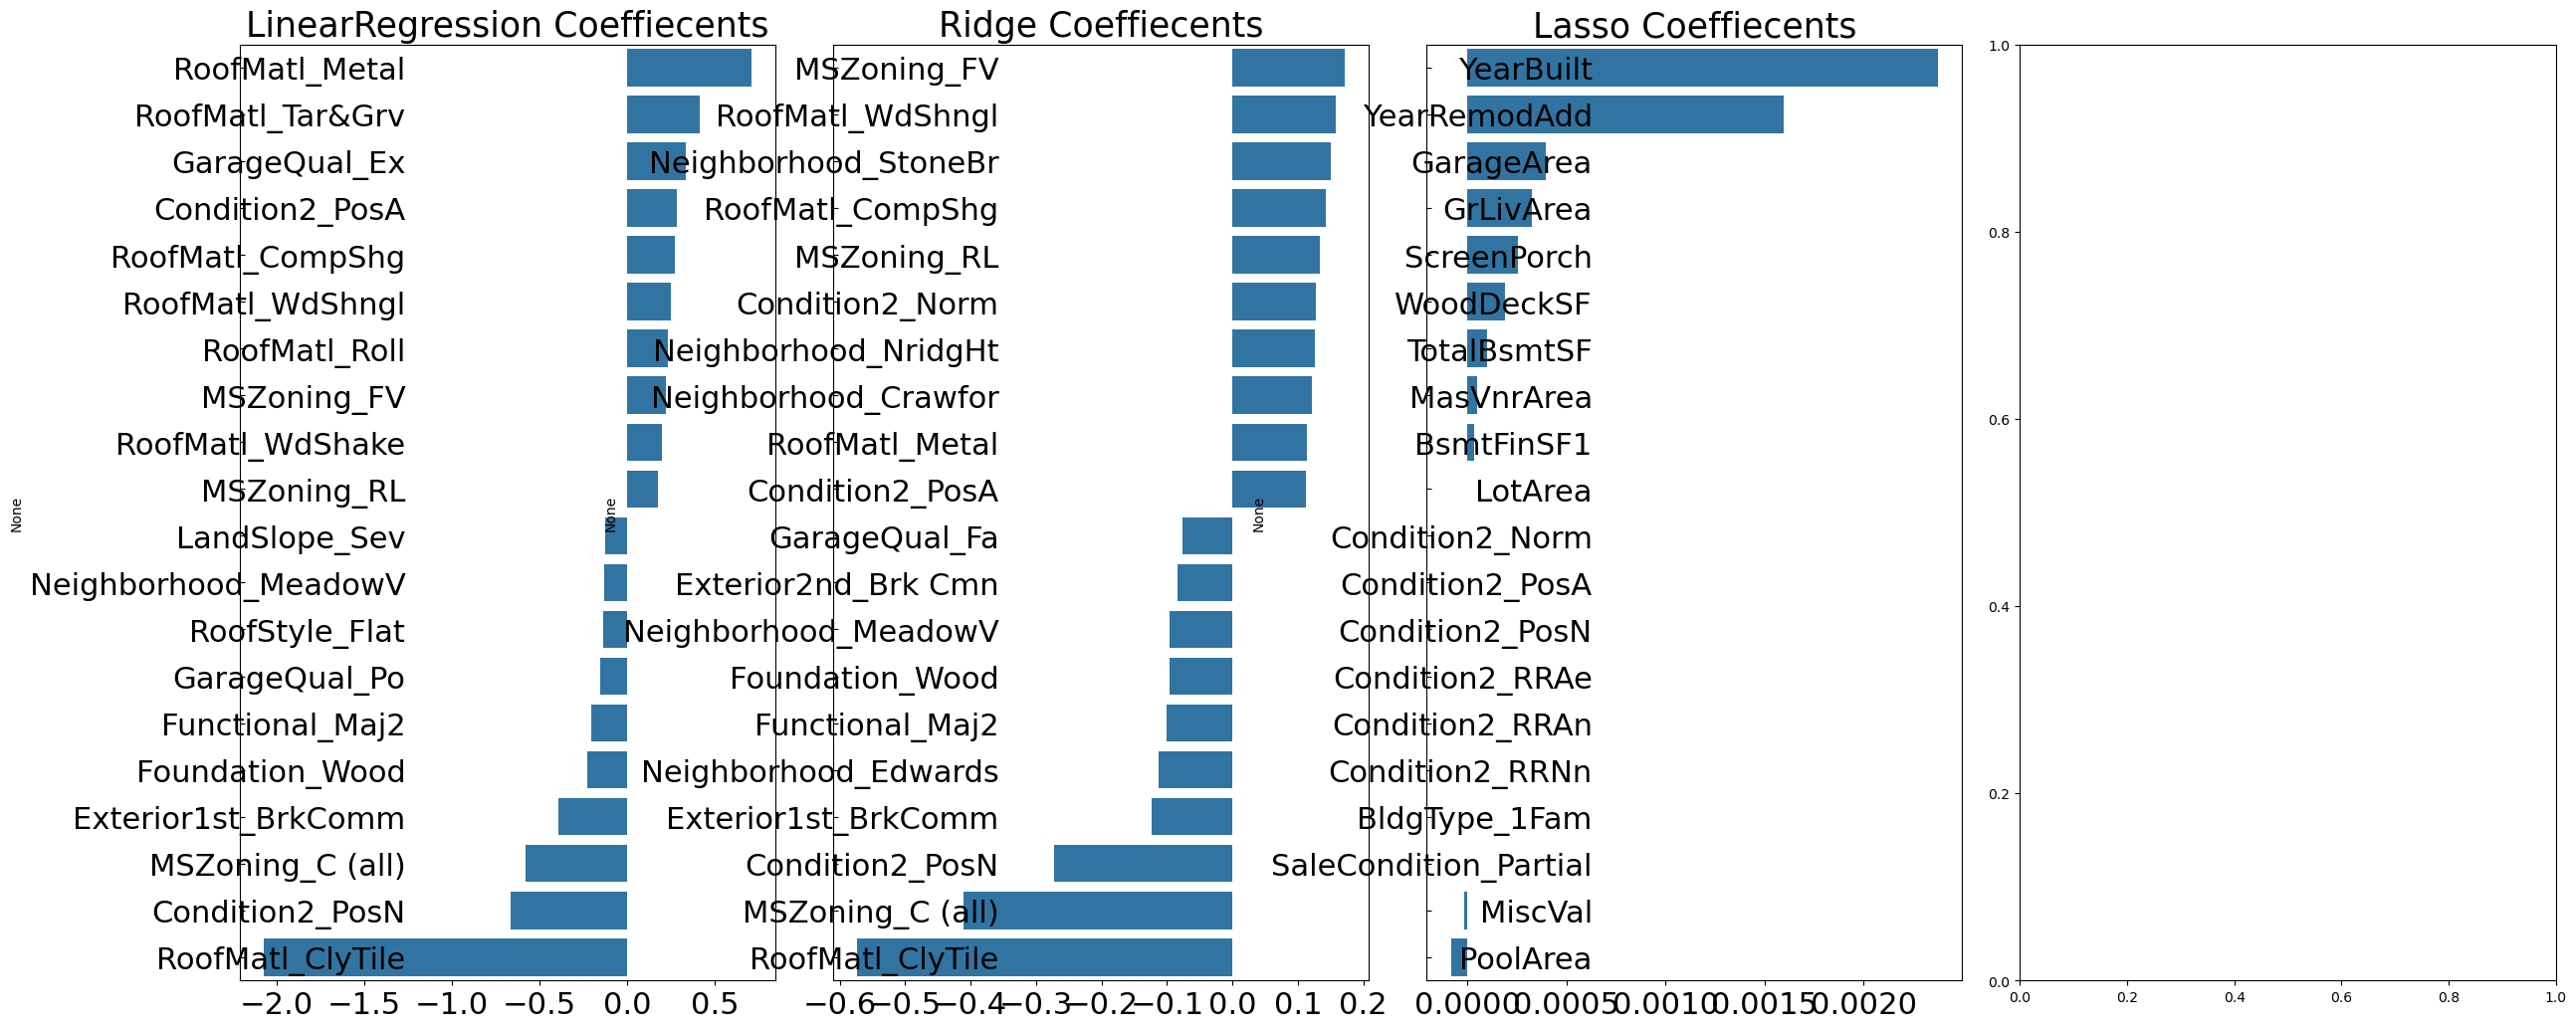

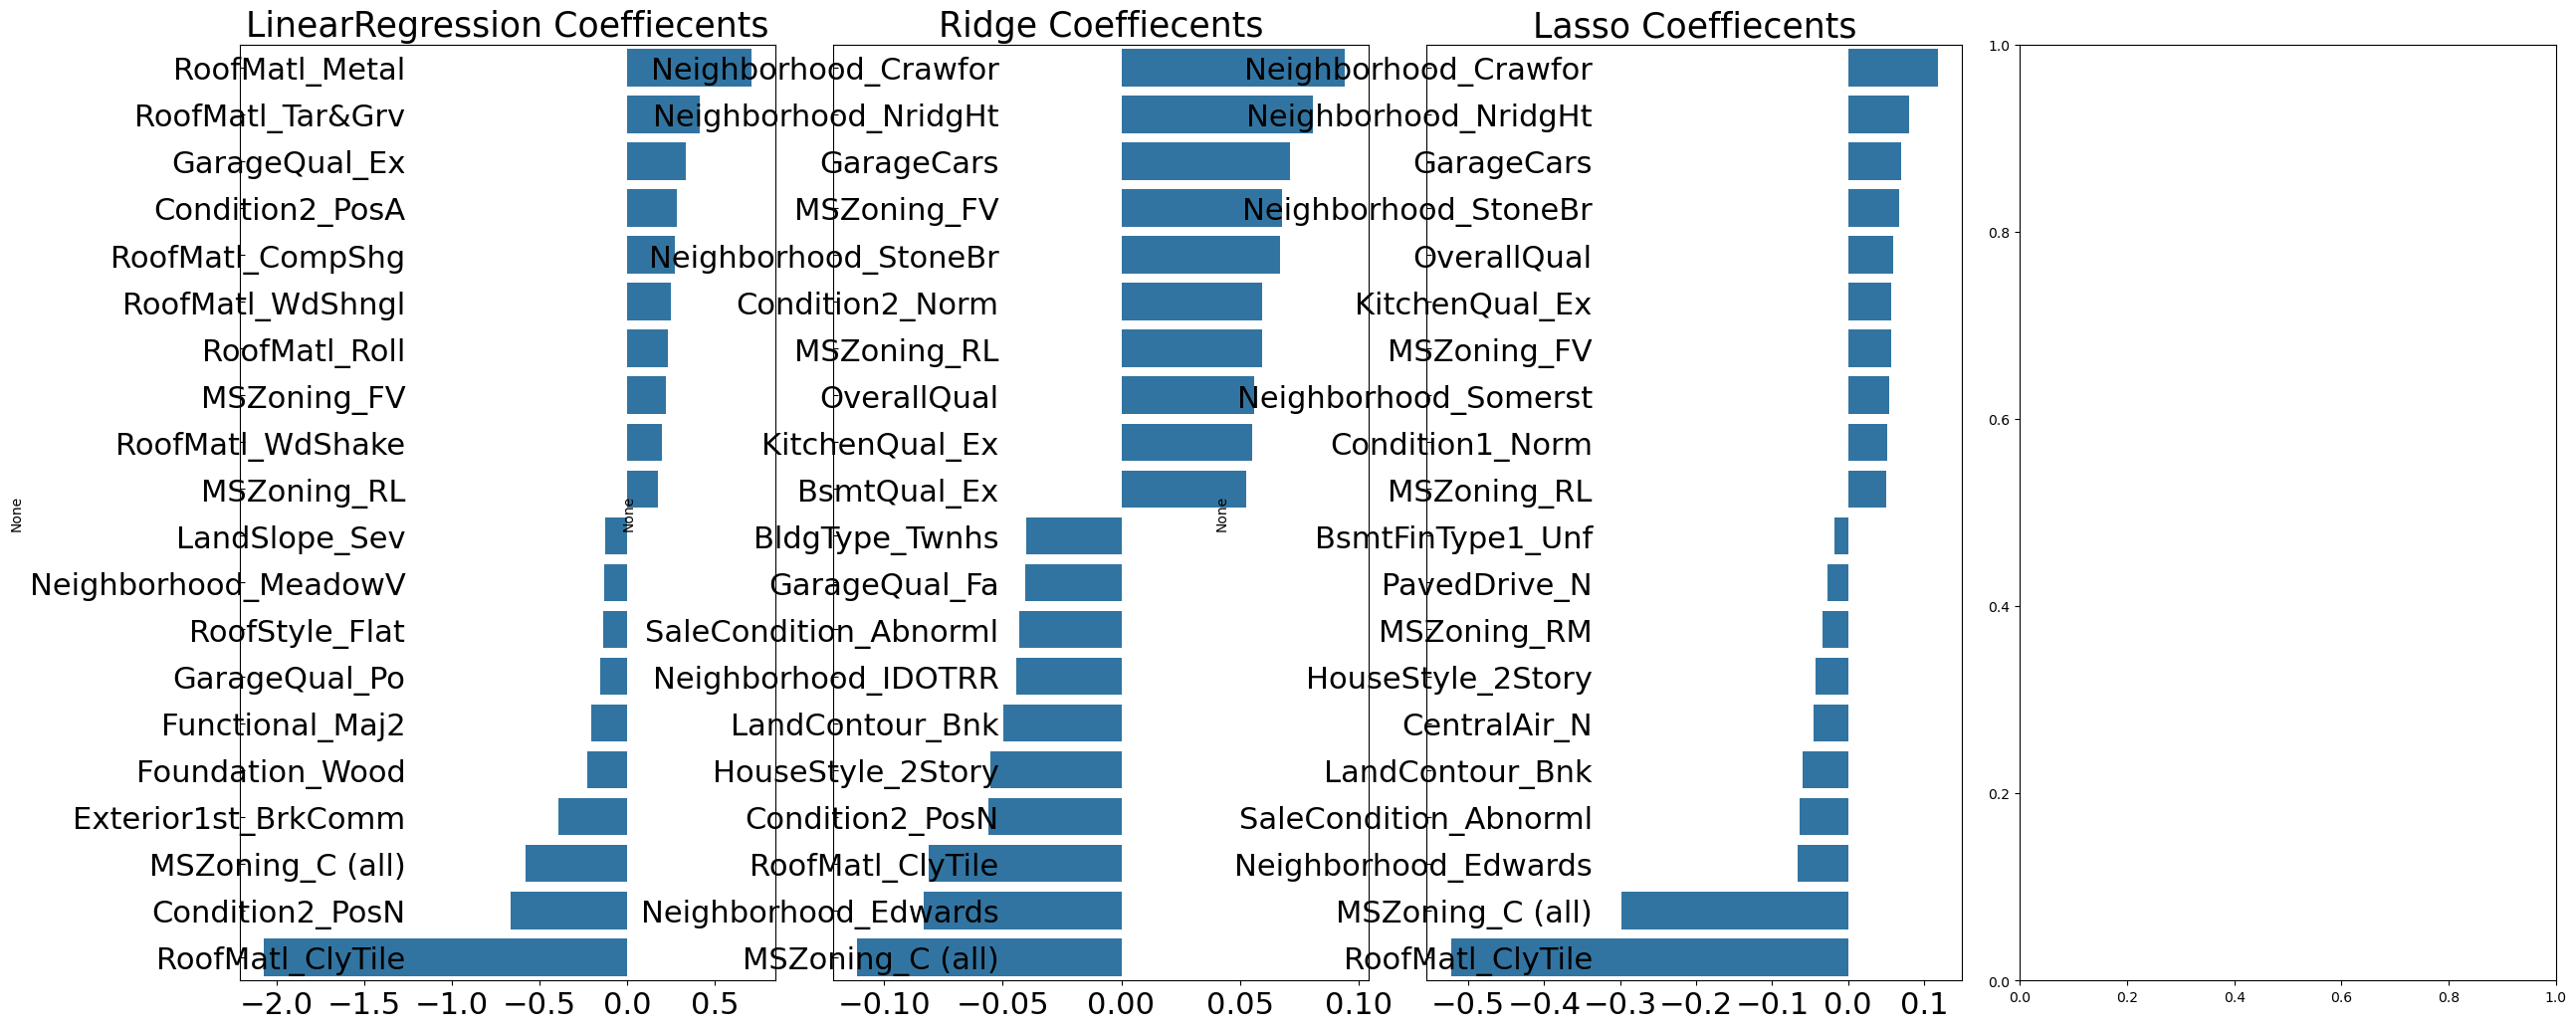

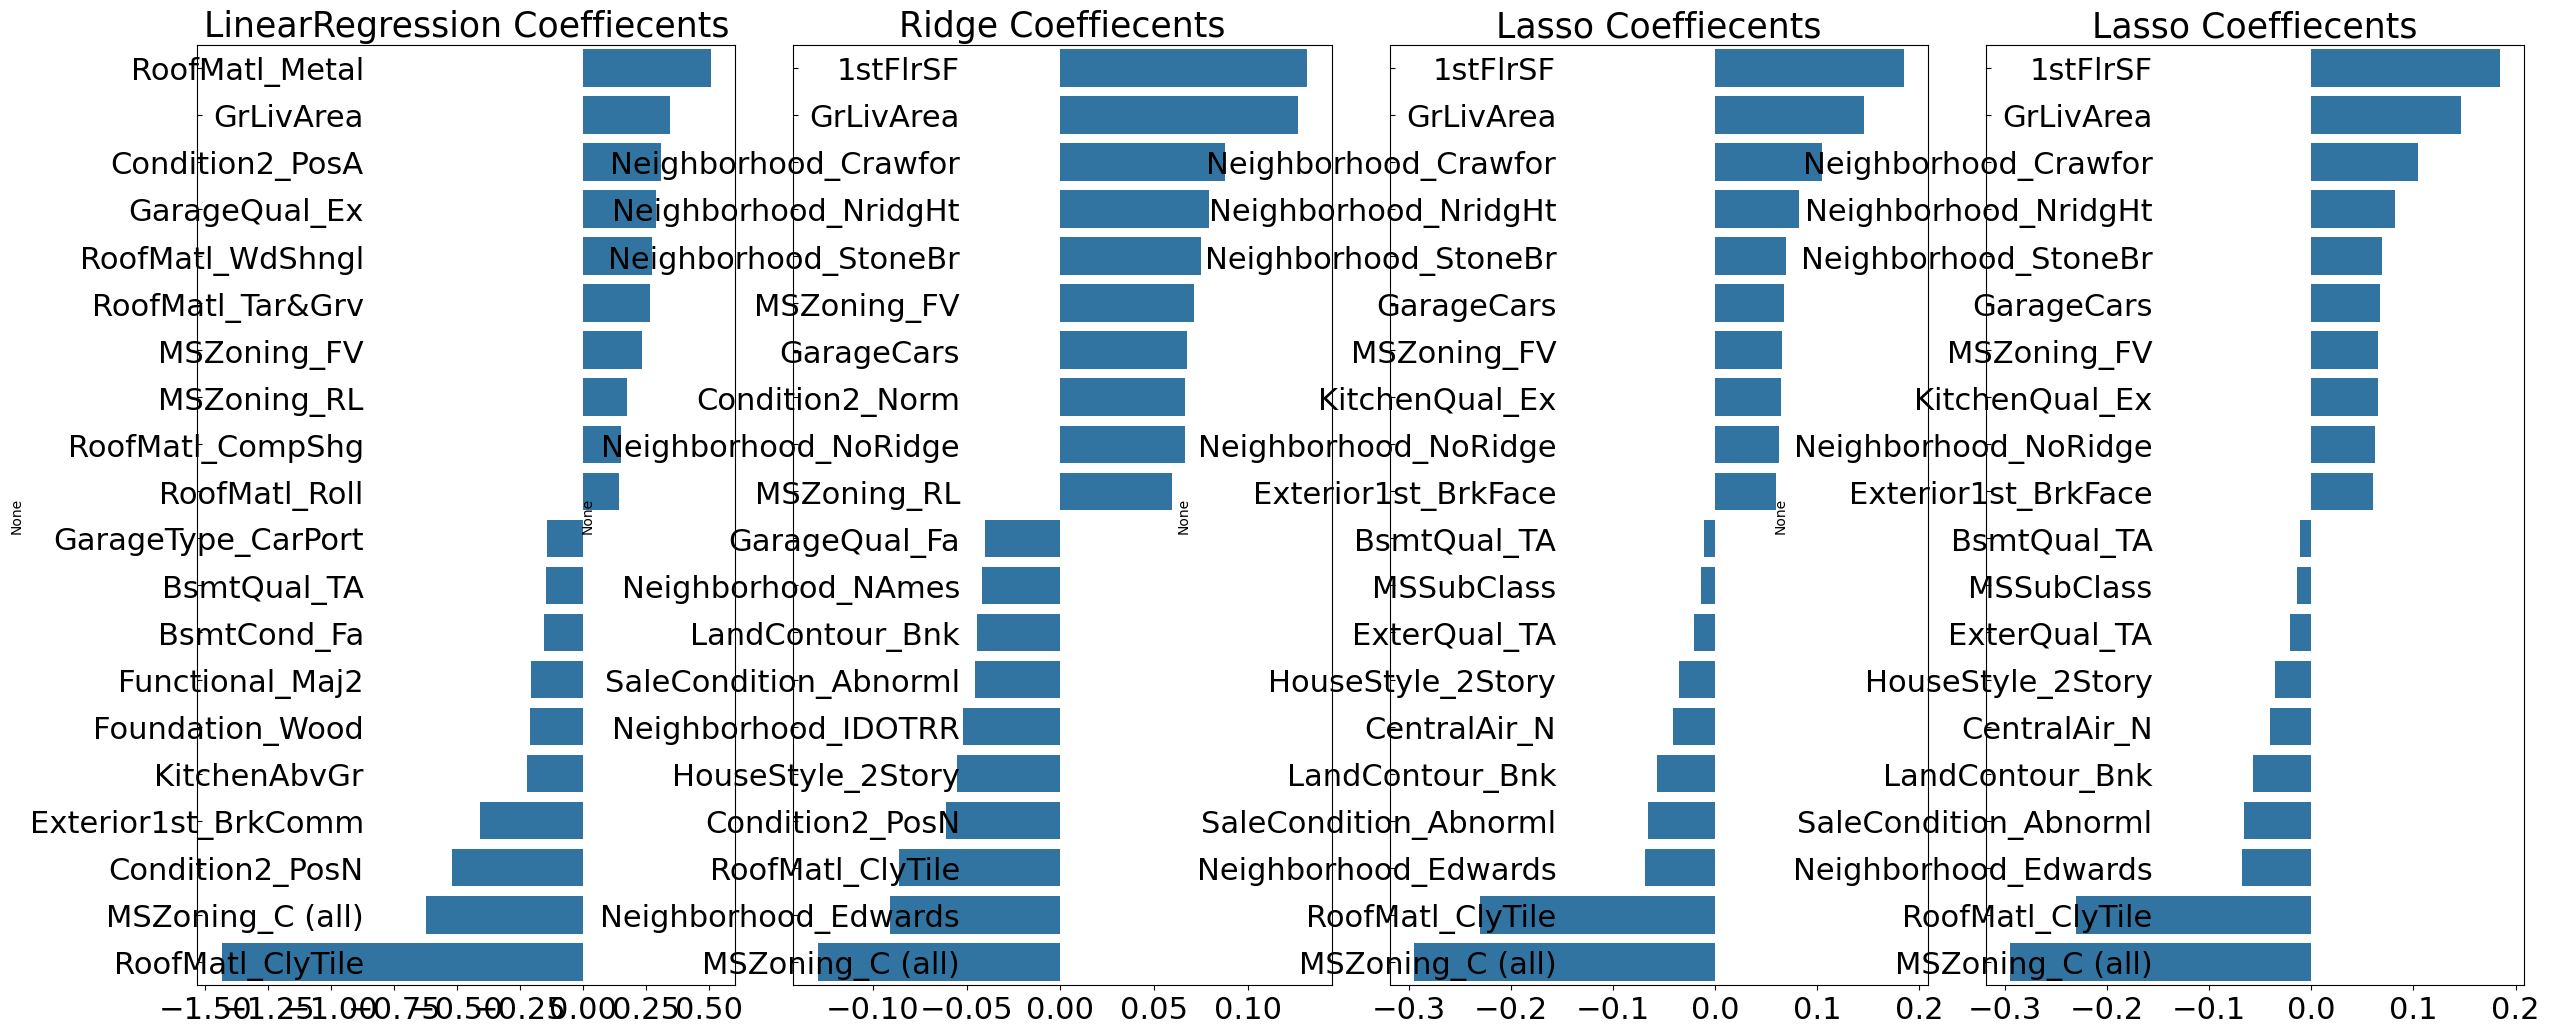

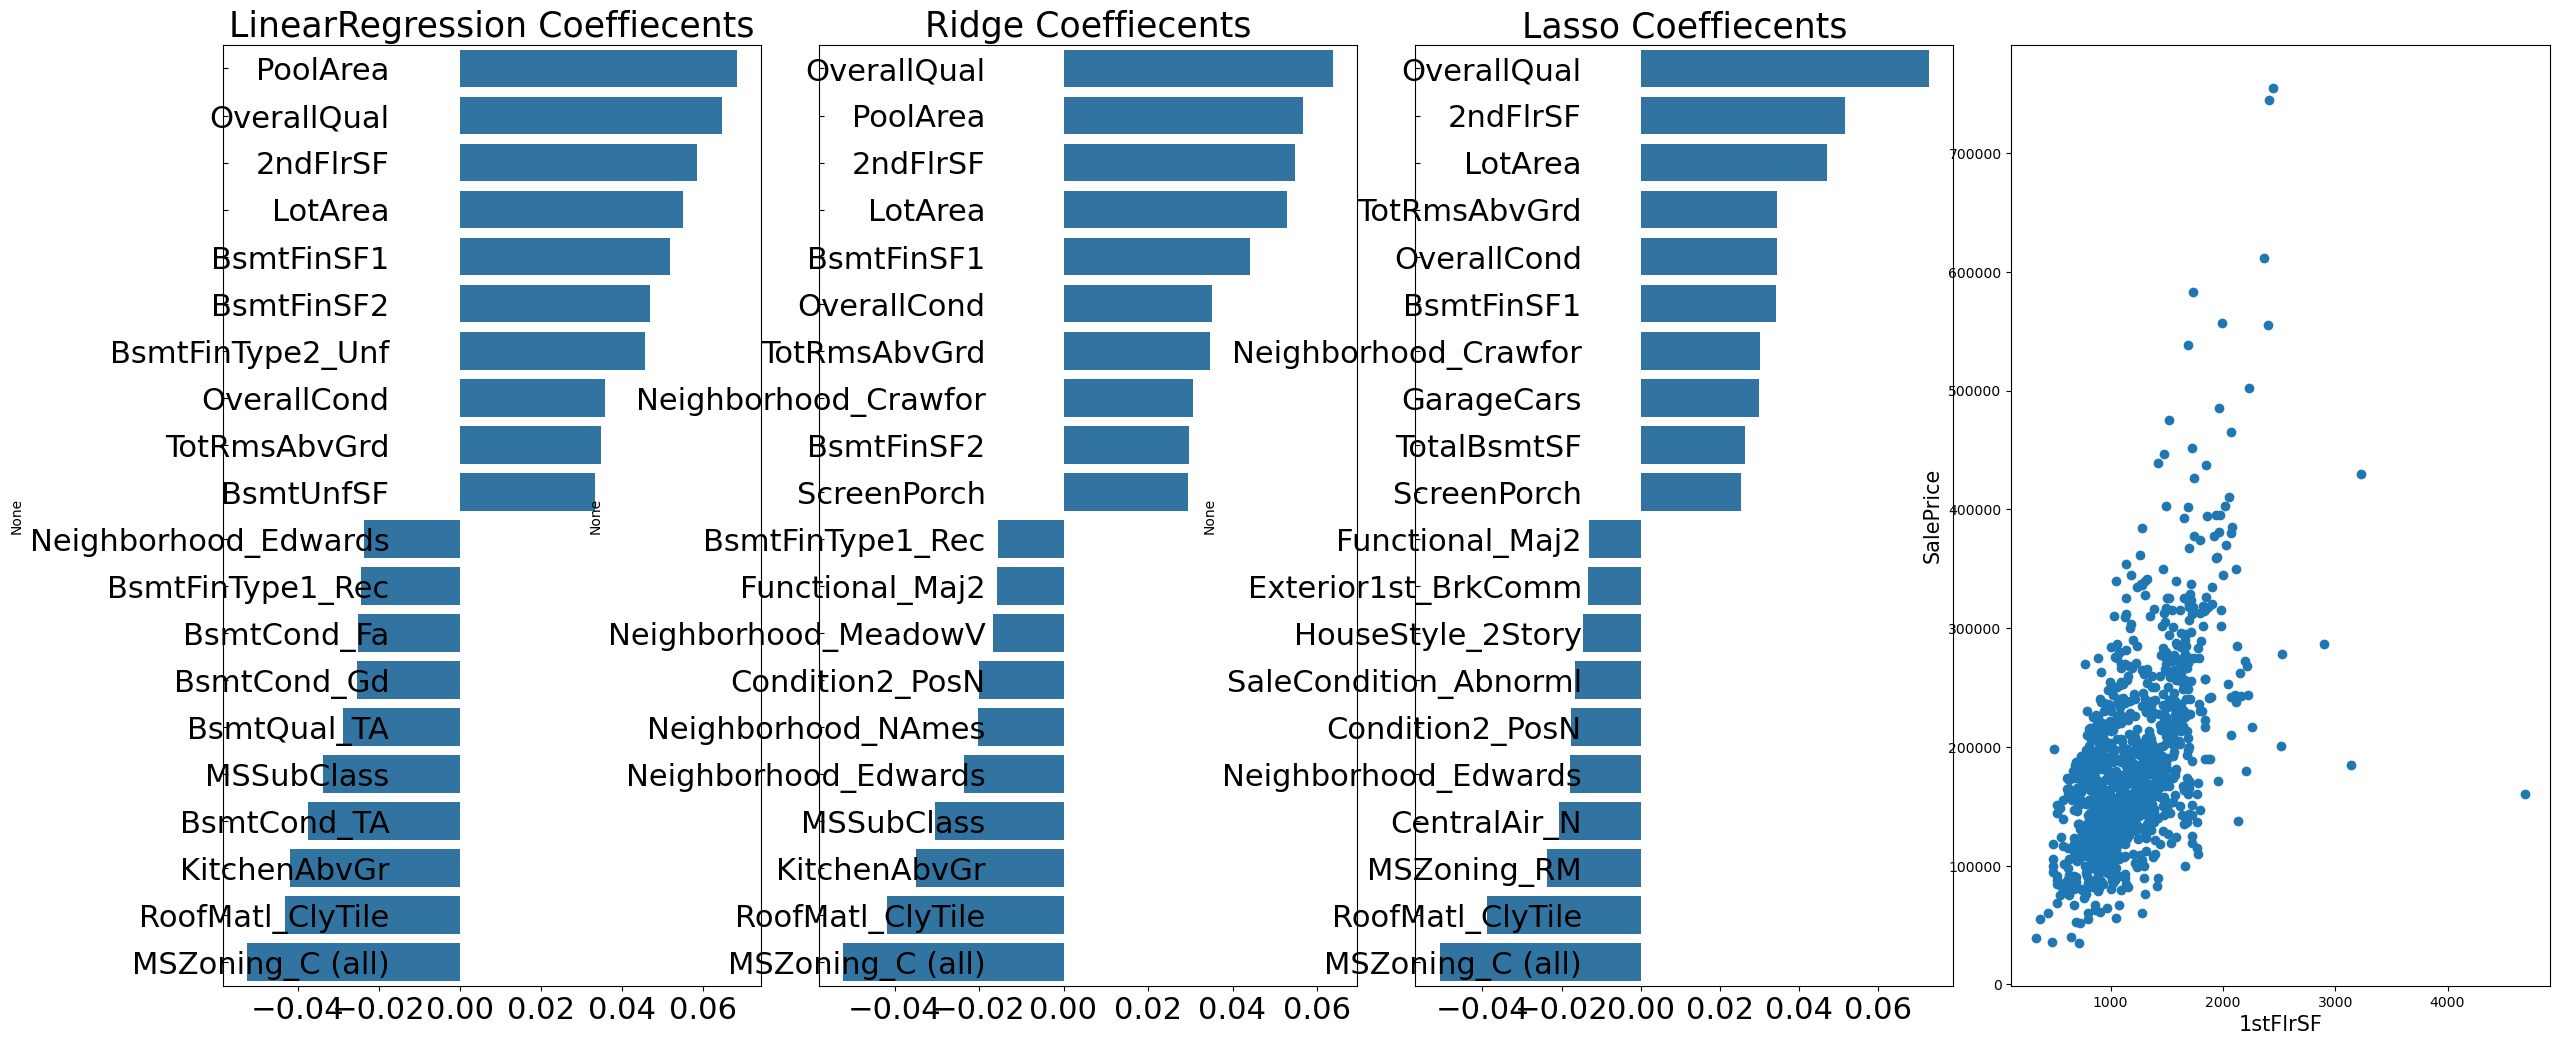

In [37]:
plt.scatter(x = house_df_org['1stFlrSF'], y = house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('1stFlrSF', fontsize=15)
plt.tight_layout()
plt.show()

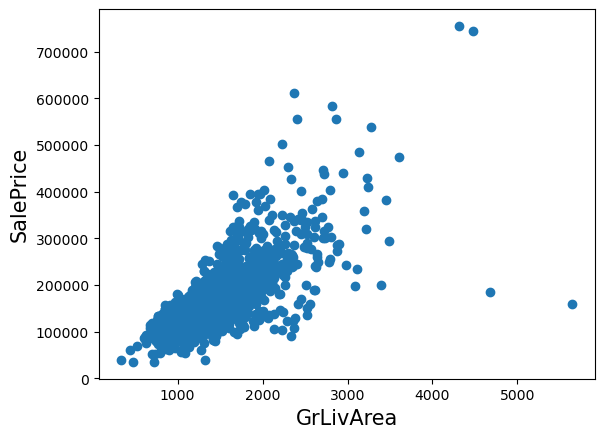

In [38]:
plt.scatter(x = house_df_org['GrLivArea'], y = house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 두 피처만 사용해서 회귀
X = house_df_org[['1stFlrSF', 'GrLivArea']]
y = house_df_org['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)

# 계수 확인
coeff = pd.Series(lr.coef_, index=X.columns)
print("회귀 계수:\n", coeff)

회귀 계수:
 1stFlrSF     53.329441
GrLivArea    80.057109
dtype: float64


회귀계수가 GrLivArea가 훨씬 크게 나오므로 주거 공간의 큰 집일수록 가격이 비싸다고 판단

In [40]:
# GrLivArea와 SalePrice 모두 로그 변환되었으므로 이를 반영한 조건 생성.
cond1 = house_df_ohe['GrLivArea'] > np.log1p(4000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = house_df_ohe[cond1 & cond2].index

print('아웃라이어 레코드 index :', outlier_index.values)
print('아웃라이어 삭제 전 house_df_ohe shape:', house_df_ohe.shape)
# DataFrame의 index를 이용하여 아웃라이어 레코드 삭제.
house_df_ohe.drop(outlier_index , axis=0, inplace=True)
print('아웃라이어 삭제 후 house_df_ohe shape:', house_df_ohe.shape)

아웃라이어 레코드 index : [ 64 373]
아웃라이어 삭제 전 house_df_ohe shape: (1168, 267)
아웃라이어 삭제 후 house_df_ohe shape: (1166, 267)


4000평 방피트 이상임에도 500,000달러 이하인 데이터에 대해 이상치 제거
=> 2개 제거

In [41]:
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1149, 최적 alpha:{'alpha': 5}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1132, 최적 alpha:{'alpha': 0.001}


In [1]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

NameError: name 'LinearRegression' is not defined

In [43]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet
# elasticnet = ElasticNet()
elasticnet = ElasticNet(alpha=0.05, l1_ratio=0.1) # l1_ratio값이 줄을수록 성능이 좋아진다.
elasticnet.fit(X_train, y_train)
models = [elasticnet]
get_rmses(models)

ElasticNet 로그 변환된 RMSE: 0.128
ElasticNet 로그 변환된 MSE: 0.016
ElasticNet 로그 변환해제 RMSE: 23907.252
ElasticNet 로그 변환해제 MSE: 571556689.239


[23907.25181276607]

In [44]:
# L2 규제를 사용하는 릿지 회귀
# 릿지 회귀
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=5) # default alpha=1 이것으로 규제를 조정할 수 있다.
ridge.fit(X_train, y_train)
models = [ridge]
get_rmses(models)

Ridge 로그 변환된 RMSE: 0.116
Ridge 로그 변환된 MSE: 0.014
Ridge 로그 변환해제 RMSE: 20989.311
Ridge 로그 변환해제 MSE: 440551191.577


[20989.3113650061]

In [45]:
# L2 규제를 사용하는 릿지 회귀
# 릿지 회귀
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=5) # default alpha=1 이것으로 규제를 조정할 수 있다.
ridge.fit(X_train2, y_train2)
models = [ridge]
get_rmses(models)

Ridge 로그 변환된 RMSE: 78.149
Ridge 로그 변환된 MSE: 6107.291
Ridge 로그 변환해제 RMSE: 1.1713526252454193e+86
Ridge 로그 변환해제 MSE: 1.3720669726693356e+172


[1.1713526252454193e+86]

In [46]:
from sklearn.linear_model import ElasticNet
# elasticnet = ElasticNet()
elasticnet = ElasticNet(alpha=0.05, l1_ratio=0.1) # l1_ratio값이 줄을수록 성능이 좋아진다.
elasticnet.fit(X_train, y_train)
models = [elasticnet]
get_rmses(models)

ElasticNet 로그 변환된 RMSE: 0.128
ElasticNet 로그 변환된 MSE: 0.016
ElasticNet 로그 변환해제 RMSE: 23907.252
ElasticNet 로그 변환해제 MSE: 571556689.239


[23907.25181276607]

## 선형 회귀 계열 결과 정리
가장 좋은 성능 모델: 데이터 세트 로그 변환 후 Lasso +  alpha값으로 튜닝  
Lasso 로그 변환된 RMSE: 0.111
Lasso 로그 변환된 MSE: 0.012

## 트리 기반 회귀 모델

In [57]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05,
                       colsample_bytree=0.5, subsample=0.8)
best_xgb = print_best_params(xgb_reg, xgb_params)

XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.123, 최적 alpha:{'n_estimators': 1000}


In [82]:
from xgboost import XGBRegressor

xgb_params = {
    'n_estimators': [1000],
    'learning_rate': [0.05],
    'max_depth': [3],
    'min_child_weight': [1],
    'subsample': [0.8 ],
    'colsample_bytree': [0.3],
}
xgb_reg = XGBRegressor()
best_xgb = print_best_params(xgb_reg, xgb_params)
# XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.1162, 최적 alpha:{'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 1000, 'subsample': 0.8}

XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.1162, 최적 alpha:{'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 1000, 'subsample': 0.8}


In [55]:
from lightgbm import LGBMRegressor

lgbm_params = {
    'n_estimators': [700],
    'learning_rate': [0.05],
    'max_depth': [3],
    'num_leaves': [5],
    'min_child_samples': [20],
    'subsample': [0.6],
    'colsample_bytree': [0.6]
}

lgbm_reg = LGBMRegressor()

best_lgbm = print_best_params(lgbm_reg, lgbm_params)


# lgbm_best = LGBMRegressor(
#     n_estimators=700,
#     learning_rate=0.05,
#     max_depth=3,
#     num_leaves=5,
#     min_child_samples=20,
#     subsample=0.6,
#     colsample_bytree=0.6,
#     random_state=42,
#     n_jobs=-1
# )
# lgbm_best.fit(X_train, y_train)

# models = [lgbm_best]
# get_rmses(models)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002559 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2939
[LightGBM] [Info] Number of data points in the train set: 932, number of used features: 164
[LightGBM] [Info] Start training from score 12.020420
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

LGBMRegressor 로그 변환된 RMSE: 0.121
LGBMRegressor 로그 변환된 MSE: 0.015
LGBMRegressor 로그 변환해제 RMSE: 22305.647
LGBMRegressor 로그 변환해제 MSE: 497541887.022

In [60]:
# 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_features.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=2)
    fig.tight_layout()
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화.
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])

# 앞 예제에서 print_best_params( )가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화
models = [best_xgb, best_lgbm]
visualize_ftr_importances(models)

In [61]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test , pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))

# 개별 모델의 학습
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.4 * ridge_pred + 0.6 * lasso_pred
preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}

#최종 혼합 모델, 개별모델의 RMSE 값 출력
get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.11284977071517661
Ridge 모델의 RMSE: 0.11686524651390272
Lasso 모델의 RMSE: 0.11198101452270068


In [62]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test , pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))

# 개별 모델의 학습
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.6 * ridge_pred + 0.4 * lasso_pred
preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}

#최종 혼합 모델, 개별모델의 RMSE 값 출력
get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.11383592752866882
Ridge 모델의 RMSE: 0.11686524651390272
Lasso 모델의 RMSE: 0.11198101452270068


In [63]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05,
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4,
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.4 * xgb_pred + 0.6 * lgbm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}

get_rmse_pred(preds)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2930
[LightGBM] [Info] Number of data points in the train set: 932, number of used features: 155
[LightGBM] [Info] Start training from score 12.029584
최종 혼합 모델의 RMSE: 0.11577632250021058
XGBM 모델의 RMSE: 0.11984920039636796
LGBM 모델의 RMSE: 0.11973930669985357


In [64]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수.
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')

    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]

        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장.
        test_pred[:, folder_counter] = model.predict(X_test_n)

    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)

    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [65]:
# get_stacking_base_datasets( )은 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환.
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환.
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
Lasso  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
LGBMRegressor  model 시작 
	 폴드 세트:  0  시작 
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2678
[LightGBM] [Info] Number of data points in the train set: 745, number of used features: 147
[LightGBM] [Info] Start training from score 12.030249
	 폴드 세트:  1  시작 
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001425 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2691
[LightGBM] [Info] Number of data points in the train set: 745, number of used features: 14

In [69]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 Stacking 형태로 결합.
Stack_final_X_train = np.concatenate((ridge_train, lasso_train,
                                      xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test,
                                     xgb_test, lgbm_test), axis=1)

# 최종 메타 모델은 라쏘 모델을 적용.
# meta_model_lasso = Lasso(alpha=0.0005)
meta_model_lasso = Ridge(alpha=8)

#기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측하고 RMSE 측정.
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test , final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 0.10959364723816757


## 트리 기반 회귀 모델

### 하이퍼파라미터 + 5폴드 세트  
- XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.125, 최적 alpha:{'n_estimators': 1000}
- LGBMRegressor 5 CV 시 최적 평균 RMSE 값: 0.1203, 최적 alpha:{'n_estimators': 1000}

### 혼합 모델
1)  
- 릿지0.4 + 라쏘0.6  
최종 혼합 모델의 RMSE: 0.11284977071517663  
Ridge 모델의 RMSE: 0.1168652465139027  
Lasso 모델의 RMSE: 0.1119810145227005  

- 릿지0.6 + 라쏘 0.4
최종 혼합 모델의 RMSE: 0.11383592752866872  
Ridge 모델의 RMSE: 0.1168652465139027  
Lasso 모델의 RMSE: 0.1119810145227005  

2)
- XGBoost0.5 + LightGBM0.5  
최종 혼합 모델의 RMSE: 0.11398712140542243  
XGBM 모델의 RMSE: 0.11565641776891314  
LGBM 모델의 RMSE: 0.11973930669985357  

- XGBoost0.6 + LightGBM0.4  
최종 혼합 모델의 RMSE: 0.11371682545815355  
XGBM 모델의 RMSE: 0.11565641776891314  
LGBM 모델의 RMSE: 0.11973930669985357  

- XGBoost0.4 + LightGBM0.6  
최종 혼합 모델의 RMSE: 0.11455884599258107  
XGBM 모델의 RMSE: 0.11565641776891314  
LGBM 모델의 RMSE: 0.11973930669985357  


### 스태킹 회귀 모델
스태킹 회귀 모델의 최종 RMSE 값은: 0.10959364723816757 

## 지금까지 결과 정리
- 릿지0.4 + 라쏘0.6 최종 혼합 모델의 RMSE: 0.11284977071517663

- Lasso 모델의 RMSE: 0.1119810145227005

- 스태킹 회귀 모델의 최종 RMSE 값은: 0.10959364723816757

## 최고 성능 모델
**스태킹 회귀 모델의 최종 RMSE 값은: 0.10959364723816757**

# 제출용 Test 데이터 전처리 진행

### train에 진행된 전처리
- NUll 많은 컬럼 삭제
- skew 컬럼 로그 변환
- 원핫 인코딩

결과값의 컬럼 개수가 266개여야한다

또 test와 train의 원핫인코딩 이후 개수가 달라지는 현상이 발생하게되는데

이때는 값이 너무 많아서
```
test_ohe1 = pd.get_dummies(test)
test_ohe2 = test_ohe1.reindex(columns=X_train.columns, fill_value=0)
```
이런 방식으로 train과 열 개수를 맞춰주는 방식을 사용해봄
- 다른 방식을 사용해보셔도 좋습니다~

In [70]:
X_train.shape

(932, 266)

In [71]:
## test_data를 받아오기
test = pd.read_csv('./test.csv')

# Null 이 너무 많은 컬럼들과 불필요한 컬럼 삭제
test.drop(['Id','PoolQC' , 'MiscFeature', 'Alley', 'Fence','FireplaceQu'], axis=1 , inplace=True)

num_cols = test.select_dtypes(include=['number']).columns
test[num_cols] = test[num_cols].fillna(test[num_cols].mean())
test_ohe1 = pd.get_dummies(test)
test_ohe2 = test_ohe1.reindex(columns=X_train.columns, fill_value=0)

# 편향 전처리 진행
test_ohe2[skew_features_top.index] = np.log1p(test_ohe2[skew_features_top.index])
test_ohe2 = pd.get_dummies(test_ohe2)

test_ohe2.shape

(292, 266)

# 저는 위에서 진행한 lgbm으로 넣어봤습니다

In [78]:
import numpy as np
import pandas as pd

# 1. 테스트 데이터 불러오기
test = pd.read_csv('./test.csv')

# 2. 불필요한 컬럼 및 null 처리
test.drop(['Id','PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

num_cols = test.select_dtypes(include=['number']).columns
test[num_cols] = test[num_cols].fillna(test[num_cols].mean())

# 3. 원핫인코딩 (train과 동일하게 컬럼 맞추기)
test_ohe1 = pd.get_dummies(test)
test_ohe2 = test_ohe1.reindex(columns=X_train.columns, fill_value=0)

# 4. 편향(skewness) 보정 (train과 동일하게)
test_ohe2[skew_features_top.index] = np.log1p(test_ohe2[skew_features_top.index])

# 5. 넘파이 배열로 변환
X_test_n = test_ohe2.values

# 6. 각 개별 기반 모델로 테스트 데이터 예측 (shape: (n_samples, 1))
ridge_test_pred = ridge_reg.predict(X_test_n).reshape(-1, 1)
lasso_test_pred = lasso_reg.predict(X_test_n).reshape(-1, 1)
xgb_test_pred = xgb_reg.predict(X_test_n).reshape(-1, 1)
lgbm_test_pred = lgbm_reg.predict(X_test_n).reshape(-1, 1)

# 7. 개별 모델 예측 결과들을 합쳐서 메타 모델 입력 데이터 생성 (shape: (n_samples, 4))
Stack_final_X_test = np.concatenate((ridge_test_pred, lasso_test_pred,
                                    xgb_test_pred, lgbm_test_pred), axis=1)

# 8. 메타 모델로 최종 예측 수행
pred = meta_model_lasso.predict(Stack_final_X_test)

# 9. 로그 변환된 타겟 복원
pred_exp = np.expm1(pred)

# 10. 제출용 sample 불러와서 예측값 넣기
sample = pd.read_csv('./sample_submission.csv')
sample['SalePrice'] = pred_exp

# 11. 제출 파일 저장
sample.to_csv('./submission.csv', index=False)


In [72]:
# ## sample_data를 받아오기
# sample = pd.read_csv('./sample_submission.csv')

# # SalePrice 가 0으로 차있는 sample
# sample

,Id,SalePrice
0,86,0
1,227,0
2,492,0
3,64,0
4,576,0
...,...,...
287,1271,0
288,903,0
289,1019,0
290,312,0


In [77]:
# test_ohe2.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.804021,9.684087,8,5,1991,1992,5.652489,0.000000,0.000000,...,False,False,False,True,False,0,False,False,True,False
1,4.110874,4.418841,9.205428,7,5,1995,1995,5.673323,6.338594,0.000000,...,False,False,False,True,True,0,False,False,False,False
2,3.931826,4.382027,9.158099,6,7,1941,1950,0.000000,6.001415,5.111988,...,False,False,False,True,False,0,False,False,True,False


In [74]:
# pred = meta_model_lasso.predict(test_ohe2)

# # 학습시 로그변환한 target을 썻으니 결과값을 다시 복원해야합니다
# pred_exp = np.expm1(pred)

# # sample 파일에 예측 값을 넣어주고
# sample["SalePrice"] = pred_exp

# # csv로 저장하기
# sample.to_csv("./submission.csv", index=False)

ValueError: X has 266 features, but Ridge is expecting 4 features as input.

In [75]:
# # 제출부분과 크기가 맞는지 확인
# pred_exp.shape

NameError: name 'pred_exp' is not defined

In [76]:
# pred_exp

NameError: name 'pred_exp' is not defined